In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer

st = SentenceTransformer("xlm-r-bert-base-nli-stsb-mean-tokens")
from utils import read_text_file, cosine_distance, get_pairwise_metric_matrix, scatter_with_annotations

import spacy
nlp = spacy.load("fr_core_news_lg")

import pandas as pd

C:\Users\antoi\Anaconda3\lib\site-packages\spacy\util.py:833: UserWarning: [W095] Model 'fr_core_news_lg' (3.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.2.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [2]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
text = read_text_file("discours/voeux.txt")

In [4]:
text

'Françaises, Français, Mes chers compatriotes de métropole, d’outre-mer et de l’étranger, À nouveau, cette dernière soirée de l’année est marquée par l’épidémie et les contraintes renforcées qui pèsent sur notre quotidien. Alors en ce moment, j’ai avant tout une pensée pour nos 123 000 compatriotes à qui le virus a enlevé la vie. Une pensée pour tous ceux qui traversent ce moment dans le deuil, la peine ou la solitude. Je n’oublie pas non plus ceux d’entre vous qui sont touchés par le COVID long comme ceux qui subissent les conséquences psychologiques de la crise sanitaire. Je veux ce soir, une fois encore, en votre nom à tous, témoigner notre reconnaissance pour nos personnels soignants, nos armées, nos forces de l’ordre, nos sapeurs-pompiers, nos auxiliaires de vie nos aides à domicile et tant d’autres professions, tous engagés ce 31 décembre comme chaque jour pour nous protéger, pour prendre soin de nous. Les semaines à venir seront difficiles nous le savons tous : le virus circule 

In [5]:
# - Idée d'Antoine : regarder les mots qui vont dans le sens global du texte
# -> phrases 
"""# - Idée de Sirine : regarder les mots les plus fréquents"""
# - Idée de Ronan : regarder le nuage de points formé par les phrases et reconstituer un résumer en faisant du clustering
"""# - Idée de Conrad : entrainer un réseau de neurones pour apprendre a faire des résumés de textes"""

'# - Idée de Conrad : entrainer un réseau de neurones pour apprendre a faire des résumés de textes'

In [6]:
emb_total = st.encode(text)

# Mots allant dans le sens du discours

In [7]:
doc = nlp(text)
words = np.unique([s.text for s in doc])

In [8]:
emb = st.encode(words)

In [9]:
distances = [cosine_distance(vect, emb_total) for vect in emb]

In [10]:
dist = pd.DataFrame({"words": words, "dist": distances}).sort_values("dist")
dist.drop_duplicates(inplace=True)

In [11]:
dist.head(15)

,words,dist
789,épidémie,0.378272
223,contagieux,0.400172
760,virus,0.408172
527,pauvres,0.415069
264,deuil,0.421166
513,pandémie,0.423722
529,peine,0.431176
446,maladies,0.431841
692,subissent,0.444757
217,conditions,0.466781


# Phrases dans le sens du discours

In [12]:
doc = nlp(text)
words = [s.text for s in doc.sents]
emb = st.encode(words)

In [13]:
distances = [cosine_distance(vect, emb_total) for vect in emb]
dist = pd.DataFrame({"words": words, "dist": distances}).sort_values("dist")
dist.drop_duplicates(inplace=True)

In [14]:
resume1 =' '.join(dist.head(8).sort_index()['words'].to_list())
resume1

'Françaises, Français, Mes chers compatriotes de métropole, d’outre-mer et de l’étranger, À nouveau, cette dernière soirée de l’année est marquée par l’épidémie et les contraintes renforcées qui pèsent sur notre quotidien. Alors en ce moment, j’ai avant tout une pensée pour nos 123 000 compatriotes à qui le virus a enlevé la vie. Une pensée pour tous ceux qui traversent ce moment dans le deuil, la peine ou la solitude. Je n’oublie pas non plus ceux d’entre vous qui sont touchés par le COVID long comme ceux qui subissent les conséquences psychologiques de la crise sanitaire. Je veux ce soir, une fois encore, en votre nom à tous, témoigner notre reconnaissance pour nos personnels soignants, nos armées, nos forces de l’ordre, nos sapeurs-pompiers, nos auxiliaires de vie nos aides à domicile et tant d’autres professions, tous engagés ce 31 décembre comme chaque jour pour nous protéger, pour prendre soin de nous. Les semaines à venir seront difficiles nous le savons tous : le virus circule 

In [15]:
len(resume1.split(' '))

280

# Résumé du résumé

In [16]:
doc = nlp(resume1)
words = [s.text for s in doc.sents]
emb = st.encode(words)

distances = [cosine_distance(vect, st.encode(resume1)) for vect in emb]
dist = pd.DataFrame({"words": words, "dist": distances}).sort_values("dist")
dist.drop_duplicates(inplace=True)

In [17]:
' '.join(dist.head(4).sort_index()['words'].to_list())


'Françaises, Français, Mes chers compatriotes de métropole, d’outre-mer et de l’étranger, À nouveau, cette dernière soirée de l’année est marquée par l’épidémie et les contraintes renforcées qui pèsent sur notre quotidien. Alors en ce moment, j’ai avant tout une pensée pour nos 123 000 compatriotes à qui le virus a enlevé la vie. Les semaines à venir seront difficiles nous le savons tous : le virus circule et circulera de plus en plus, des mesures ont été prises par le gouvernement pour y faire face et je vous demande à tous et toute d’y veiller, des secteurs comme la culture, le sport, la restauration, l’hôtellerie, le tourisme, ou l’événementiel vont à nouveau subir les conséquences économiques de cette situation. La France qui, dès avril 2020, a été à l’initiative des dons de doses aux pays pauvres, et nous seront au rendez-vous pour amplifier l’effort et ainsi permettre d’entrevoir la fin de ce virus sous sa forme aigue.'

# clustering

In [18]:
doc = nlp(text)
words = [s.text for s in doc.sents]
emb = st.encode(words)

In [19]:
pca = PCA(2).fit_transform(emb)

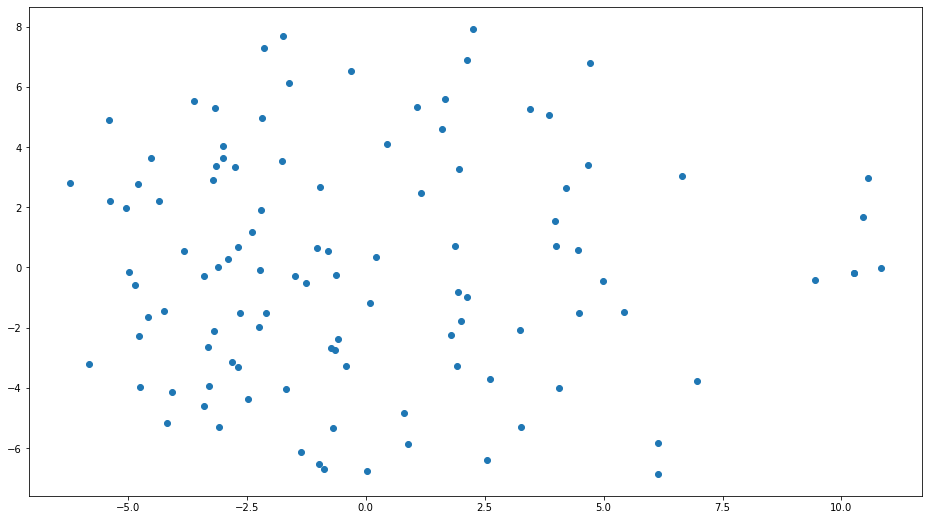

In [20]:
plt.subplots(figsize=(16,9))
plt.scatter(pca[:,0], pca[:, 1])
plt.show()

In [53]:
kmeans = KMeans(n_clusters=16).fit(emb)

<AxesSubplot:>

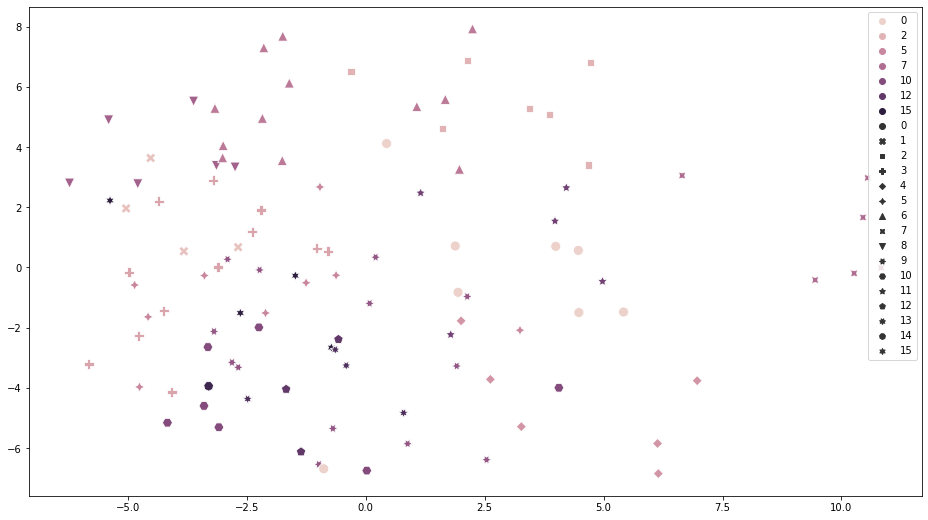

In [54]:
import seaborn as sns
plt.subplots(figsize=(16,9))
sns.scatterplot(x=pca[:,0], y=pca[:,1], style=kmeans.labels_, hue=kmeans.labels_, s=100)

In [55]:
center_indices = [
    int(np.argmin([cosine_distance(x, centroid) for x in emb]))
    for centroid in kmeans.cluster_centers_
]
center_sentences = np.array(words)[sorted(center_indices)]

In [56]:
resume2 = ' '.join(center_sentences)

In [59]:
resume2

'Alors en ce moment, j’ai avant tout une pensée pour nos 123 000 compatriotes à qui le virus a enlevé la vie. C’est pour cela qu’une nouvelle fois, j’en appelle aux 5 millions de non-vaccinés. Tout la France compte sur vous. Nous avons protégé les travailleurs, aidé les plus modestes d’entre nous, nous avons investi pour défendre la dignité de nos compatriotes en situation de handicaps, pris des mesures et des décisions claires pour mieux protéger nos enfants, accompagner nos aînés. Notre agriculture avec l’assurance récolte, la retraite minimale à 1000 euros ; et la réforme de l’Etat, de notre Haute Fonction publique avec entre autres la création de l’Institut National du Service Public, rien que ces dernières semaines et dans les prochains mois, des décisions dont on parlait parfois depuis des décennies, que je viens à la cavalcade ici d’essayer de rassembler ont été prises et seront prises qui changeront la vie. Tout cela, c’est grâce à vous, grâce à nous tous, grâce à notre esprit 

In [57]:
cosine_distance(st.encode(resume1), emb_total)

-5.960464477539063e-08

In [58]:
cosine_distance(st.encode(resume2), emb_total)

0.1752244234085083

In [ ]:
# regrouper par paires de proche en proche et conserver une phrase par paire

In [50]:
import torch

In [110]:
dist = get_pairwise_metric_matrix(emb, metric="l2").round(2)
for i in range(len(emb)):
    dist[i,i] = np.inf

dist_tens = torch.Tensor(dist)

In [112]:
dist

array([[  inf, 14.6 , 14.22, ..., 16.89, 15.58, 16.25],
       [14.6 ,   inf, 15.83, ..., 18.39, 17.34, 19.43],
       [14.22, 15.83,   inf, ..., 19.14, 17.  , 18.61],
       ...,
       [16.89, 18.39, 19.14, ...,   inf, 14.25, 13.95],
       [15.58, 17.34, 17.  , ..., 14.25,   inf, 11.31],
       [16.25, 19.43, 18.61, ..., 13.95, 11.31,   inf]])

In [148]:
pair = []
for i in range(len(emb)):
    pair.append(np.array([pca[i], pca[np.argmin(dist[i])]]))

array([[-4.077124 , -4.142275 ],
       [-5.8273144, -3.2083178]], dtype=float32)

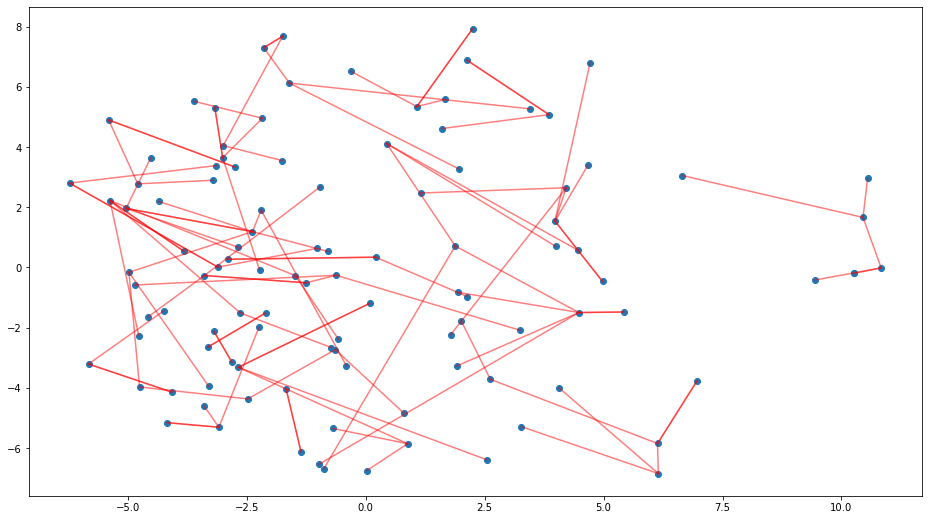

In [151]:
plt.subplots(figsize=(16,9))
plt.scatter(pca[:,0], pca[:,1])


for coord in pair:
    plt.plot(coord[:,0], coord[:,1], color='r', alpha=.5)


pair[0]